# Library imports : 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#Importing warnings library to ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

# Dataset import :

In [3]:
#importing dataset
data = "D:\College\Semster 2\Pattern recognition\Cocktail Juice Quality_Training Dataset.csv"
df_raw = pd.read_csv(data)

# Outlier Handling :

In [4]:
#outlier detection
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls

In [5]:
# outlier handling
index_list = []
for feature in ['Fruit quality','fixed acidity', 'citric acid',
                'Percentage of sweeteners','chlorides','Calories','density','pH','sulphates']:
    index_list.extend(outliers(df_raw, feature))
    
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
df_cleaned = remove(df_raw, index_list)

In [6]:
#choosing targets and features
feature_cols = ['Fruit quality','fixed acidity', 'citric acid',
                'Percentage of sweeteners','chlorides','Calories','density','pH','sulphates']
X = df_cleaned[feature_cols] # Features
y = df_cleaned.quality # Target variable

In [7]:
# checking for null values
df_cleaned.isnull().sum()

Fruit quality               0
fixed acidity               0
citric acid                 0
Percentage of sweeteners    0
chlorides                   0
Calories                    0
density                     0
pH                          0
sulphates                   0
quality                     0
dtype: int64

# model selection :

In [8]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Implementation :

In [10]:
#Implementing Logistic Regression
logreg = LogisticRegression(solver='lbfgs',max_iter=100000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  3,  2,  0,  0],
       [ 0, 74, 18,  1,  0],
       [ 0, 24, 50,  5,  0],
       [ 0,  1, 13,  7,  0],
       [ 0,  0,  0,  1,  0]], dtype=int64)

In [11]:
#logistic regression accuracy
accuracy_score_logreg = accuracy_score(y_test,y_pred)
accuracy_score_logreg*100

65.82914572864321

Text(0.5, 257.44, 'Predicted label')

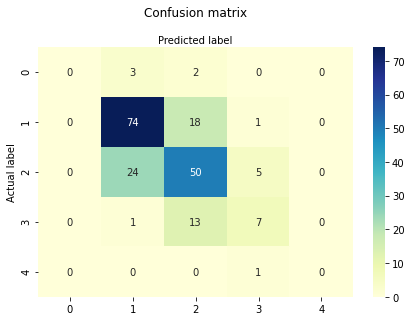

In [12]:
# confusion matrix chart
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
#randomforest
#creating model object
# model_rf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10,
#                            min_samples_leaf=2, max_features=3, bootstrap=False)
model_rf = RandomForestClassifier()
#default hyperparameters worked best
#training model rf
model_rf.fit(X_train,y_train)
#making prediction
pred_rf = model_rf.predict(X_test)

# cm3 = confusion_matrix(y_test,pred_rf)
# cm3

In [14]:
# random forest accuracy
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

78.89447236180904

In [15]:
#SVM
model_svc = SVC (C = 10, kernel = 'rbf', gamma = 0.6)
#we used grid search to get the best hyperparameters
model_svc.fit(X_train, y_train)
model_svc.score(X_test, y_test)*100

76.38190954773869

In [16]:
# predicting using svm 
# and you can change the model_svc with another model variable for different model predictions
model_svc.predict([[9.4,7.1,0,1.9,0.076,11,0.9978,3.51,0.56]])

array([6], dtype=int64)

In [17]:
model_dt = DecisionTreeClassifier(max_depth = 4)
model_dt.fit(X_train,y_train)
#making prediction using Decision Tree
pred_dt = model_dt.predict(X_test)

In [18]:
#decision tree accuracy
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

60.30150753768844

In [19]:
#confusion matrix
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[ 0,  2,  3,  0,  0],
       [ 0, 59, 34,  0,  0],
       [ 0, 20, 53,  6,  0],
       [ 0,  3, 10,  8,  0],
       [ 0,  0,  0,  1,  0]], dtype=int64)

In [20]:
#naive bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train);
nb_pred = model_nb.predict(X_test)
accuray = accuracy_score(nb_pred, y_test)
print("Accuracy:", accuray*100)

Accuracy: 61.30653266331658


In [21]:
#K-neighbors classifier
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy*100)

Accuracy: 71.85929648241206
